In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [0]:
data = pd.read_csv('train.csv')

In [0]:
data.head()

,ct2010,pickup_date_time,nb_pickup
0,100,2015-01-01 01:00:00,70
1,100,2015-01-01 02:00:00,62
2,100,2015-01-01 03:00:00,34
3,100,2015-01-01 04:00:00,16
4,100,2015-01-01 05:00:00,5


In [0]:

data['pickup_date_time'] = pd.to_datetime(data.pickup_date_time)
data.loc[:, 'pickup_month'] = data['pickup_date_time'].dt.month
data.loc[:, 'pickup_day'] = data['pickup_date_time'].dt.day
data.loc[:, 'pickup_hour'] = data['pickup_date_time'].dt.hour
data.loc[:, 'pickup_minute'] = data['pickup_date_time'].dt.minute
data.loc[:, 'pickup_hour_weekofyear'] = data['pickup_date_time'].dt.weekofyear
data.loc[:, 'pickup_dayofweek'] = data['pickup_date_time'].dt.dayofweek
data.loc[:, 'pickup_week_hour'] = data['pickup_dayofweek'] * 24 + data['pickup_hour']

In [0]:
data.sample(20)

,ct2010,pickup_date_time,nb_pickup,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_hour_weekofyear,pickup_dayofweek,pickup_week_hour
469986,33500,2015-05-25 00:00:00,1,5,25,0,0,22,0,0
463086,30900,2015-05-17 09:00:00,2,5,17,9,0,20,6,153
1227537,30500,2015-04-25 01:00:00,12,4,25,1,0,17,5,121
498266,54900,2015-05-10 10:00:00,7,5,10,10,0,19,6,154
268966,2200,2015-05-24 00:00:00,1,5,24,0,0,21,6,144
1243470,44500,2015-04-26 19:00:00,1,4,26,19,0,17,6,163
1050152,3200,2015-04-05 09:00:00,60,4,5,9,0,14,6,153
664821,19900,2015-02-23 22:00:00,36,2,23,22,0,9,0,22
505190,57900,2015-05-22 18:00:00,1,5,22,18,0,21,4,114
1000983,52000,2015-03-27 07:00:00,1,3,27,7,0,13,4,103


In [0]:
def month_func(times):
    return times.month

def season(month):
    if month > 2:
        #summer
        return 1
    else:
        #spring
        return 0

def holidays(month_date):
    holidays = ['2015-01-01', '2015-01-19', '2015-02-12', '2015-02-16', '2015-05-25']
    if month_date in holidays:
        return 1
    return 0

data['pickup_season'] = data.pickup_month.apply(lambda x: season(x))

In [0]:
data.sample(20)

,ct2010,pickup_date_time,nb_pickup,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_hour_weekofyear,pickup_dayofweek,pickup_week_hour,pickup_season
253804,202,2015-05-08 18:00:00,7,5,8,18,0,19,4,114,1
211738,35700,2015-01-05 07:00:00,4,1,5,7,0,2,0,7,0
730526,49500,2015-02-23 07:00:00,2,2,23,7,0,9,0,7,0
1069281,5700,2015-04-12 17:00:00,79,4,12,17,0,15,6,161,1
1121043,12500,2015-04-19 00:00:00,279,4,19,0,0,16,6,144,1
1228669,30903,2015-04-01 04:00:00,1,4,1,4,0,14,2,52,1
529834,1600,2015-02-22 14:00:00,83,2,22,14,0,8,6,158,0
202037,29700,2015-01-15 05:00:00,1,1,15,5,0,3,3,77,0
966437,28900,2015-03-24 02:00:00,5,3,24,2,0,13,1,26,1
666709,20102,2015-02-11 01:00:00,2,2,11,1,0,7,2,49,0


In [0]:
NewData = data

NewData.drop('pickup_date_time', axis=1)

TTdata = NewData[['ct2010','nb_pickup','pickup_hour','pickup_dayofweek','pickup_season']]
TTdata

,ct2010,nb_pickup,pickup_hour,pickup_dayofweek,pickup_season
0,100,70,1,3,0
1,100,62,2,3,0
2,100,34,3,3,0
3,100,16,4,3,0
4,100,5,5,3,0
5,100,10,6,3,0
6,100,5,7,3,0
7,100,3,8,3,0
8,100,6,9,3,0
9,100,9,10,3,0


In [0]:
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = TTdata[['ct2010']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

,0
263847,0.008648
811526,0.039519
1168779,0.111728
105100,0.082716
565269,0.039519
516266,0.652494
819313,0.046296
99861,0.079012
1105397,0.064821
293682,0.032099


In [0]:
TTdata['ct2010'] = df_normalized
TTdata.sample(20)

C:\Users\ayomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ct2010,nb_pickup,pickup_hour,pickup_dayofweek,pickup_season
35099,0.027160,61,11,4,0
1083738,0.046296,184,12,1,1
295146,0.033333,1,0,2,1
1086010,0.048148,99,10,6,1
265560,0.009259,18,14,0,1
1173512,0.115432,7,3,6,1
326090,0.056173,527,21,3,1
1138835,0.089519,24,5,3,1
1088720,0.050617,129,16,6,1
860550,0.079012,98,14,3,1


In [0]:
# sns.set_style(style='darkgrid')
# fig, ax = plt.subplots(ncols=3, sharey=True,figsize=(16,7))
# ax[0].plot(NewData.groupby('pickup_hour').mean()['nb_pickup'], 'bo-', lw=2, alpha=0.7)
# ax[1].plot(NewData.groupby('pickup_dayofweek').mean()['nb_pickup'], 'go-', lw=2, alpha=0.7)
# ax[2].plot(NewData.groupby('pickup_month').mean()['nb_pickup'], 'ro-', lw=2, alpha=0.7)
# ax[0].set_xlabel('Hour of Day')
# ax[1].set_xlabel('Day of Week')
# ax[2].set_xlabel('Month of Year')
# ax[0].set_ylabel('No. of Pickups')
# fig.suptitle('No. of Pickups to DateTme')
# plt.show()

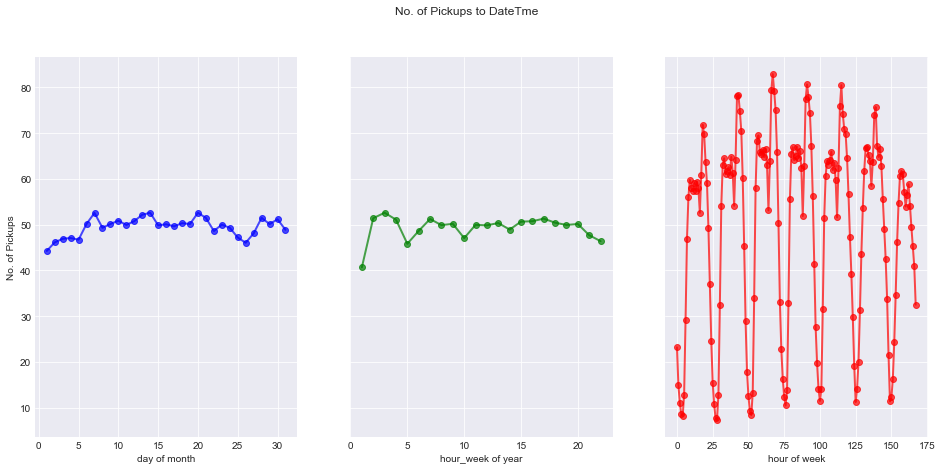

In [0]:
# sns.set_style(style='darkgrid')
# fig, ax = plt.subplots(ncols=3, sharey=True,figsize=(16,7))
# ax[0].plot(NewData.groupby('pickup_day').mean()['nb_pickup'], 'bo-', lw=2, alpha=0.7)
# ax[1].plot(NewData.groupby('pickup_hour_weekofyear').mean()['nb_pickup'], 'go-', lw=2, alpha=0.7)
# ax[2].plot(NewData.groupby('pickup_week_hour').mean()['nb_pickup'], 'ro-', lw=2, alpha=0.7)
# ax[0].set_xlabel('day of month')
# ax[1].set_xlabel('hour_week of year')
# ax[2].set_xlabel('hour of week')
# ax[0].set_ylabel('No. of Pickups')
# fig.suptitle('No. of Pickups to DateTme')
# plt.show()

In [0]:
# corr = NewData.corr('spearman')
# f, ax = plt.subplots(figsize=(12, 12))
# sns.heatmap(corr, vmax=1., square=True, cmap='Blues', annot=True)
# plt.title("Final feature correlation map", fontsize=15)
# plt.show()

In [0]:
# x_fill = NewData.drop(['nb_pickup','pickup_minute', 'pickup_date_time'], axis = 1)

x_fill = TTdata.drop(['nb_pickup'], axis = 1)
y_fill = TTdata['nb_pickup']

x_train, x_test, y_train, y_test = train_test_split(x_fill,y_fill, test_size=0.3)

In [0]:
y_test.sample(20)

356024       2
1000783     10
1058770     74
1268257      1
1144725     19
827645      55
7604         2
142184      89
673196       1
1185173      1
742837       5
891616       5
481541       1
273928       5
3760        79
285784     271
945418       5
701308       2
960082       3
215855       1
Name: nb_pickup, dtype: int64

In [0]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [0]:
# rf_pipe = make_pipeline(RandomForestRegressor(n_jobs=-1))
# rf_params = {'randomforestregressor__n_estimators' : [10, 50, 100],
#              'randomforestregressor__max_features' : [3, 6, 10, 'auto'],
#              'randomforestregressor__max_depth' : [5, 10, None]}
# rf_grid = GridSearchCV(rf_pipe, rf_params, cv=3, scoring='r2', verbose=2)
# rf_grid.fit(x_train, y_train)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [0]:
pred = clf.predict(x_test)
pred

array([ 3,  2,  1, ...,  3, 55, 49], dtype=int64)

In [0]:
# clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
# clf.fit(x_train, y_train)

In [0]:
from sklearn.metrics import mean_absolute_error, accuracy_score

accuracy_score(y_test, pred)

0.21478415231461812

In [0]:
pred.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [0]:
# nData = data[['','','','']]

data = pd.read_csv('submission_transformed.csv')


,Unnamed: 0,pickup_date_time,ct2010,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_hour_weekofyear,pickup_dayofweek,pickup_season,pickup_holidays,pickup_week_hoursubmission_sample
0,0,2015-06-01 01:00:00,100,6,1,1,0,23,0,1,0,1
1,1,2015-06-01 02:00:00,100,6,1,2,0,23,0,1,0,2
2,2,2015-06-01 03:00:00,100,6,1,3,0,23,0,1,0,3
3,3,2015-06-01 04:00:00,100,6,1,4,0,23,0,1,0,4
4,4,2015-06-01 05:00:00,100,6,1,5,0,23,0,1,0,5


In [0]:
TTdata2 = data[['ct2010','pickup_hour','pickup_dayofweek','pickup_season']]
TTdata2.sample()

,ct2010,pickup_hour,pickup_dayofweek,pickup_season
68029,8800,10,3,1


In [0]:
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = TTdata2[['ct2010']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [0]:
TTdata2['ct2010'] = df_normalized
TTdata2.sample(20)

C:\Users\ayomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ct2010,pickup_hour,pickup_dayofweek,pickup_season
188903,0.156790,2,4,1
106224,0.085185,7,0,1
168396,0.133951,14,0,1
193669,0.166667,9,5,1
171098,0.135815,23,1,1
82675,0.067284,0,4,1
141974,0.111117,1,6,1
246682,0.503086,22,0,1
182418,0.147531,15,0,1
116253,0.091358,5,1,1


In [0]:
pred = clf.predict(TTdata2)
predN = pd.DataFrame(pred)

In [0]:
sub = pd.read_csv('submission_sample.csv')
sub['nb_pickup'] = predN

In [0]:
sub.sample(20)

,key,nb_pickup
201668,30903 / 2015-06-07 15:00:00,1
11598,1502 / 2015-06-09 08:00:00,50
37410,5000 / 2015-06-12 07:00:00,109
59987,7900 / 2015-06-04 22:00:00,148
229533,52500 / 2015-06-21 05:00:00,5
202816,31700 / 2015-06-07 13:00:00,4
224117,50202 / 2015-06-25 22:00:00,1
178584,23200 / 2015-06-26 10:00:00,1
103592,13500 / 2015-06-11 04:00:00,17
43280,5700 / 2015-06-05 06:00:00,49


In [0]:
sub.to_csv('team_A1_1.csv')

In [0]:
sub.head()

,key,nb_pickup
0,100 / 2015-06-01 01:00:00,6
1,100 / 2015-06-01 02:00:00,2
2,100 / 2015-06-01 03:00:00,1
3,100 / 2015-06-01 04:00:00,3
4,100 / 2015-06-01 05:00:00,7


In [0]:
data.head()

,Unnamed: 0,pickup_date_time,ct2010,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_hour_weekofyear,pickup_dayofweek,pickup_season,pickup_holidays,pickup_week_hoursubmission_sample
0,0,2015-06-01 01:00:00,100,6,1,1,0,23,0,1,0,1
1,1,2015-06-01 02:00:00,100,6,1,2,0,23,0,1,0,2
2,2,2015-06-01 03:00:00,100,6,1,3,0,23,0,1,0,3
3,3,2015-06-01 04:00:00,100,6,1,4,0,23,0,1,0,4
4,4,2015-06-01 05:00:00,100,6,1,5,0,23,0,1,0,5


In [0]:

sns.lmplot( x="pickup_hour", y="pickup_no", data=data.sample(1000), fit_reg=False, hue='pickup_point', 
           legend=False, size=12, aspect=1)
plt.legend(loc='lower right')

KeyError: "['pickup_no' 'pickup_point'] not in index"

In [0]:
data = pd.read_csv('train.csv')